Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


Time taken:  0.012999773025512695


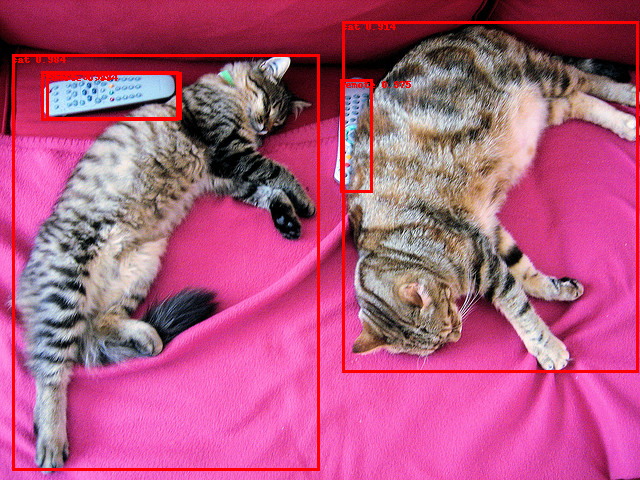

Detected remote with confidence 0.994 at location [46.96, 72.61, 181.02, 119.73]
Detected remote with confidence 0.975 at location [340.66, 79.19, 372.59, 192.65]
Detected cat with confidence 0.984 at location [12.27, 54.25, 319.42, 470.99]
Detected remote with confidence 0.922 at location [41.66, 71.96, 178.7, 120.33]
Detected cat with confidence 0.914 at location [342.34, 21.48, 638.64, 372.46]


In [9]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image, ImageDraw
import requests
from IPython.display import display
import time

url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
# image = Image.open("1.jpg")


image_processor = AutoImageProcessor.from_pretrained("hustvl/yolos-tiny")
model = AutoModelForObjectDetection.from_pretrained("hustvl/yolos-tiny")

inputs = image_processor(images=image, return_tensors="pt")
model.to('cuda')
inputs.to('cuda')
inference_start=time.time()
outputs = model(**inputs)
inference_end=time.time()
print("Time taken: ",inference_end-inference_start)
# Convert outputs (bounding boxes and class logits) to COCO API
target_sizes = torch.tensor([image.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

# Draw bounding boxes on the image
draw = ImageDraw.Draw(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    label_str = model.config.id2label[label.item()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]), f"{label_str} {round(score.item(), 3)}", fill="red")

# Display the image with bounding boxes in the notebook
display(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

In [18]:
import huggingface_hub
dataset=huggingface_hub.list_datasets()

In [20]:
dataset

<generator object HfApi.list_datasets at 0x000001E5D4509150>

In [23]:
from datasets import list_datasets
# list_datasets()

In [26]:
from datasets import load_dataset
dataset = load_dataset("ChristophSchuhmann/MS_COCO_2017_URL_TEXT")
# data_files = {"train": "train.csv", "test": "test.csv"}
# dataset = load_dataset("ChristophSchuhmann/MS_COCO_2017_URL_TEXT", data_files=data_files)

In [12]:
import torchvision
torchvision.datasets.KittiFlow(root='',split='train')

FileNotFoundError: Could not find the Kitti flow images. Please make sure the directory structure is correct.

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1280x720 at 0x2E6DACEDB90>


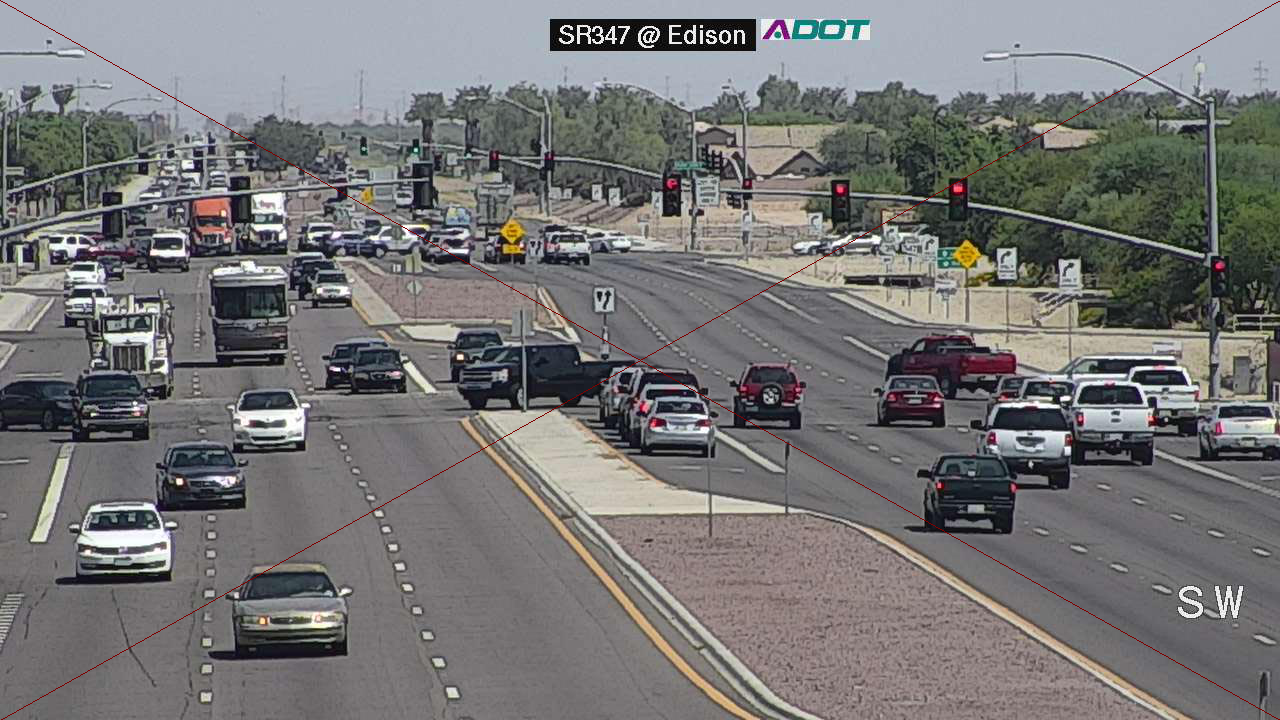

In [19]:
import sys
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
with Image.open("1.jpg") as im:
    print(im)
    draw = ImageDraw.Draw(im)
    draw.line((0, 0) + im.size, fill=128)
    draw.line((0, im.size[1], im.size[0], 0), fill=128)
    display(im)